In [1]:
import pandas as pd,numpy as np


In [2]:
data=pd.read_csv('uber.csv')

In [3]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
data=data.drop(['Unnamed: 0','pickup_datetime','key'],axis=1)
data

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1


In [5]:
data.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
data.dropoff_latitude.mean()

39.92389040183263

In [7]:
data.dropoff_latitude.fillna(value=data.dropoff_latitude.mean(),inplace=True)
data.dropoff_longitude.fillna(value=data.dropoff_longitude.mean(),inplace=True)

In [8]:
data.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [9]:
from matplotlib.pyplot import boxplot as box

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff7c2cc1330>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff7c2cc18d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff7c2cc1060>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff7c2cc1e70>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff7c2cc2140>,
 'means': []}

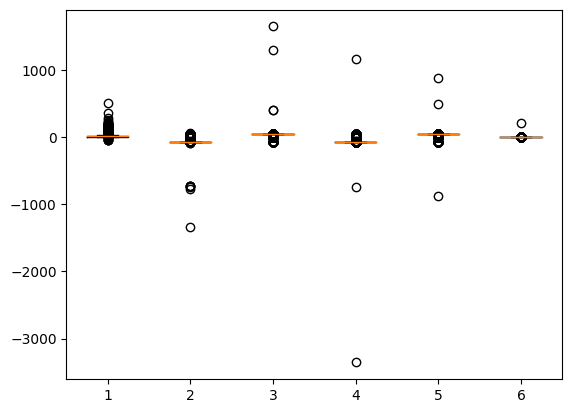

In [10]:
box(data)

In [11]:
data.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.010457,-0.008481,0.008986,-0.011014,0.010150
pickup_longitude,0.010457,1.000000,-0.816461,0.833026,-0.846324,-0.000414
pickup_latitude,-0.008481,-0.816461,1.000000,-0.774787,0.702367,-0.001560
dropoff_longitude,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.010150,-0.000414,-0.001560,0.000033,-0.000659,1.000000


In [12]:
y=data.passenger_count
y=pd.DataFrame(y)
x=data.drop(['passenger_count'],axis=1)
x=pd.DataFrame(x)

In [13]:
x.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,7.5,-73.999817,40.738354,-73.999512,40.723217
1,7.7,-73.994355,40.728225,-73.994710,40.750325
2,12.9,-74.005043,40.740770,-73.962565,40.772647
3,5.3,-73.976124,40.790844,-73.965316,40.803349
4,16.0,-73.925023,40.744085,-73.973082,40.761247


In [14]:
y.head()

,passenger_count
0,1
1,1
2,1
3,3
4,5


In [15]:
from sklearn.preprocessing  import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)
x.columns=['fare_amount','pickup_longitude','pickup_lattitude','dropoff_longitude','dropoff_latitude']

In [16]:
x.head()

,fare_amount,pickup_longitude,pickup_lattitude,dropoff_longitude,dropoff_latitude
0,-0.389826,-0.128712,0.103940,-0.112387,0.117638
1,-0.369627,-0.128235,0.102628,-0.112021,0.121628
2,0.155533,-0.129169,0.104253,-0.109570,0.124913
3,-0.612008,-0.126641,0.110738,-0.109780,0.129431
4,0.468608,-0.122173,0.104682,-0.110372,0.123235


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff7b2c4dd20>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff7b2c4e2c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff7b2c4db70>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff7b2c4e860>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff7b2c4eb30>],
 'means': []}

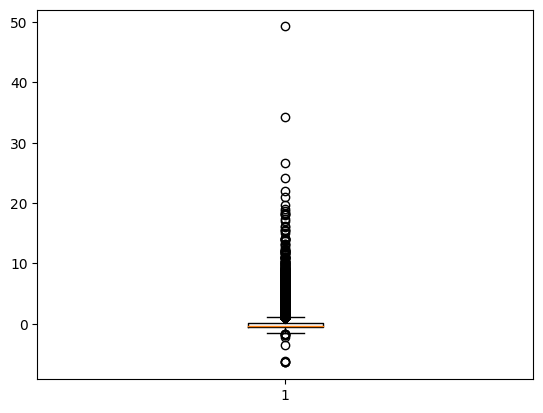

In [17]:
box(x.fare_amount)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [19]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)


LinearRegression()

In [20]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()
model2.fit(x_train,y_train.values.ravel())

RandomForestRegressor()

In [21]:
y_pred1=model1.predict(x_test)

In [22]:
y_pred2=model2.predict(x_test)

In [23]:
from sklearn.metrics import r2_score,mean_squared_error
print('Model1--->',r2_score(y_test,y_pred1))
print('Model1--->',mean_squared_error(y_test,y_pred1))

Model1---> 8.66513652939549e-05
Model1---> 1.7263829999924318


In [24]:
print('Model2--->',r2_score(y_test,y_pred2))
print('Model2--->',mean_squared_error(y_test,y_pred2))

Model2---> -0.061006230841204934
Model2---> 1.8318618531409063
